In [1]:
import numpy as np
import glob
import os

# start the training
from utils import get_data
n_epoch = 5
batch_size = 4
res_xyz = (160, 160, 80)
out_channels = 17
imagesTr_list = sorted(glob.glob("./data_dir/WORD/imagesTr/*.nii.gz"))
case_id_list = [os.path.basename(f).split(".")[0] for f in imagesTr_list]

print("case_id_list: ", case_id_list)
case_dir_list = []
for case_id in case_id_list:
    imagesTr_path = "./data_dir/WORD/imagesTr/{}.nii.gz".format(case_id)
    labelsTr_path = "./data_dir/WORD/labelsTr/{}.nii.gz".format(case_id)
    case_dir_list.append(
        {"imagesTr": imagesTr_path, "labelsTr": labelsTr_path}
    )

for case_dir in case_dir_list:
    print("case_dir: ", case_dir)

case_id_list:  ['word_0014', 'word_0016', 'word_0017', 'word_0019', 'word_0021', 'word_0023', 'word_0024', 'word_0033', 'word_0034', 'word_0037', 'word_0043', 'word_0050', 'word_0052', 'word_0054', 'word_0057', 'word_0060', 'word_0069', 'word_0074', 'word_0076', 'word_0077', 'word_0088', 'word_0092', 'word_0097', 'word_0099', 'word_0103', 'word_0110', 'word_0120', 'word_0124', 'word_0129', 'word_0131']
case_dir:  {'imagesTr': './data_dir/WORD/imagesTr/word_0014.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0014.nii.gz'}
case_dir:  {'imagesTr': './data_dir/WORD/imagesTr/word_0016.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0016.nii.gz'}
case_dir:  {'imagesTr': './data_dir/WORD/imagesTr/word_0017.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0017.nii.gz'}
case_dir:  {'imagesTr': './data_dir/WORD/imagesTr/word_0019.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0019.nii.gz'}
case_dir:  {'imagesTr': './data_dir/WORD/imagesTr/word_0021.nii.gz', 'labelsTr': './data_d

In [2]:
training_ratio = 0.7
validation_ratio = 0.2
testing_ratio = 0.1
training_num = int(len(case_dir_list) * training_ratio)
validation_num = int(len(case_dir_list) * validation_ratio)
testing_num = int(len(case_dir_list) * testing_ratio)
# shuffle
np.random.seed(0)
np.random.shuffle(case_dir_list)
training_list = case_dir_list[:training_num]
validation_list = case_dir_list[training_num:training_num + validation_num]
testing_list = case_dir_list[training_num + validation_num:]

print("training_list: ", training_list)
print("validation_list: ", validation_list)
print("testing_list: ", testing_list)

training_list:  [{'imagesTr': './data_dir/WORD/imagesTr/word_0017.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0017.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0129.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0129.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0054.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0054.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0043.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0043.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0120.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0120.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0103.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0103.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0124.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0124.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0050.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0050.nii.gz'}, {'imagesTr': './data_dir/WORD/imagesTr/word_0074.nii.gz

In [3]:
import nibabel as nib
import numpy as np

# batch_x, batch_y = get_data(dir_list, batch_size)

def get_data(data_dir: list, batch_size: int, res_xyz: tuple, out_channels: int):
    # Load data from the given directory
    in_channel = 1
    data_x = np.zeros((batch_size, in_channel, *res_xyz))
    data_y = np.zeros((batch_size, out_channels, *res_xyz))
    for idx, case_dir in enumerate(data_dir):
        # load the input data
        input_path = case_dir["imagesTr"]
        input_img = nib.load(input_path)
        input_data = input_img.get_fdata()
        input_data = np.clip(input_data, -1024, 2976)
        input_data = (input_data + 1024) / 4000

        label_path = case_dir["labelsTr"]
        label_img = nib.load(label_path)
        label_data = label_img.get_fdata()

        res_x, res_y, res_z = res_xyz
        # pad input data.shape[0] and data.shape[1] to res_x and res_y
        if res_x > input_data.shape[0] and res_y > input_data.shape[1]:
            pad_x = (res_x - input_data.shape[0]) // 2
            pad_y = (res_y - input_data.shape[1]) // 2
            # rex_z is less than input_data.shape[2], so we need to select random start_z and end_z
            start_z = np.random.randint(0, input_data.shape[2] - res_z)
            end_z = start_z + res_z
            data_x[idx, 0, pad_x:pad_x+input_data.shape[0], pad_y:pad_y+input_data.shape[1], :] = input_data[:, :, start_z:end_z]
            data_y[idx, :, pad_x:pad_x+input_data.shape[0], pad_y:pad_y+input_data.shape[1], :] = label_data[:, :, start_z:end_z]
        elif res_x < input_data.shape[0] and res_y < input_data.shape[1]:
            # random crop
            start_x = np.random.randint(0, input_data.shape[0] - res_x)
            start_y = np.random.randint(0, input_data.shape[1] - res_y)
            start_z = np.random.randint(0, input_data.shape[2] - res_z)
            end_x = start_x + res_x
            end_y = start_y + res_y
            end_z = start_z + res_z
            data_x[idx, 0, :, :, :] = input_data[start_x:end_x, start_y:end_y, start_z:end_z]
            data_y[idx, :, :, :] = label_data[start_x:end_x, start_y:end_y, start_z:end_z]
        else:
            raise ValueError("res_x and res_y should be both larger or smaller than input_data.shape[0] and input_data.shape[1]")
            

        # crop and pad
        
        
    return data_x, data_y
            


In [ ]:
# create monai dataset
from monai.data import Dataset
from monai.transforms import Compose, LoadNiftid, AddChanneld, ScaleIntensityRanged, RandCropByPosNegLabeld, RandRotate90d, ToTensord



In [4]:
for idx_epoch in range(n_epoch):
    # random shuffle the training list and select the batch_size of the training list
    dir_list = training_list
    np.random.shuffle(dir_list)
    dir_list = dir_list[:batch_size]
    # do the training
    batch_x, batch_y = get_data(dir_list, batch_size, res_xyz, out_channels)
    print("batch_x: ", batch_x.shape, "batch_y: ", batch_y.shape)


case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0057.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0057.nii.gz'}
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0069.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0069.nii.gz'}
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0023.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0023.nii.gz'}
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0103.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0103.nii.gz'}
batch_x:  (4, 1, 512, 512, 64) batch_y:  (4, 17, 512, 512, 64)
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0099.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0099.nii.gz'}
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0129.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0129.nii.gz'}
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0074.nii.gz', 'labelsTr': './data_dir/WORD/labelsTr/word_0074.nii.gz'}
case_dir: {'imagesTr': './data_dir/WORD/imagesTr/word_0057.nii

In [9]:
for i in range(1, 38):
    link = f"https://imgs.iotku.com/pdfimm/2405/13/952264538336526336/{i}.png"
    # using curl to download the image
    os.system(f"curl -O {link}")
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  390k  100  390k    0     0  1089k      0 --:--:-- --:--:-- --:--:-- 1091k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  262k  100  262k    0     0  1326k      0 --:--:-- --:--:-- --:--:-- 1325k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291k  100  291k    0     0  1136k      0 --:--:-- --:--:-- --:--:-- 1141k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  101k  100  101k    0     0   634k      0 --:--:-- --:--:-- --:--:--  636k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
image = nib.load("data_dir/WORD/imagesTr/word_0004.nii.gz").get_fdata()
label = nib.load("data_dir/WORD/labelsTr/word_0004.nii.gz").get_fdata()
output = nib.load("data_dir/WORD/labelsTr/word_0004.nii.gz").get_fdata()

In [13]:
import numpy as np
import nibabel as nib
from matplotlib.colors import ListedColormap

# colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
#           '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3']
colors = ['#000000',  # Black for background
          '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
          '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
          '#800000', '#aaffc3']
custom_cmap = ListedColormap(colors)

epoch = 300
mean_dice = 0.8
# plot the middle slice of the image
import matplotlib.pyplot as plt
idx = image.shape[2] // 5 * 4

plt.figure(figsize=(18, 6), dpi=300)
plt.subplot(131)
plt.imshow(np.rot90(image[:, :, idx], 3), cmap="gray")
plt.axis("off")
plt.title("image")

plt.subplot(132)
plt.imshow(np.rot90(label[:, :, idx], 3), cmap=custom_cmap)
plt.axis("off")
plt.title("label")

plt.subplot(133)
plt.imshow(np.rot90(output[:, :, idx], 3), cmap=custom_cmap)
plt.axis("off")
plt.title("output")

plt.title(f"Epoch: {epoch}, Mean Dice: {mean_dice}")
save_path = f"epoch_{epoch:.0f}_mean_dice_{mean_dice:.4f}.png"
plt.savefig(save_path)
plt.close()


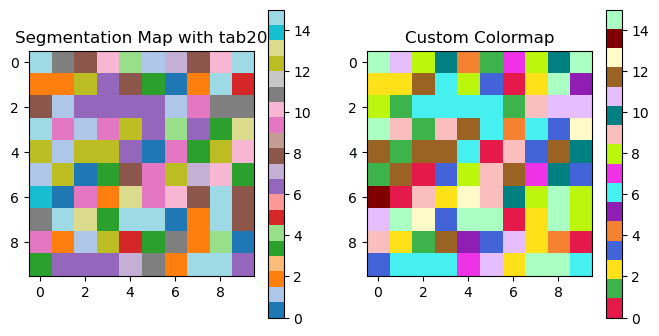

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: a 10x10 array of random integers between 0 and 15
data = np.random.randint(0, 16, size=(10, 10))

# Using a built-in colormap (tab20)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Segmentation Map with tab20')
plt.imshow(data, cmap='tab20')
plt.colorbar()

# Creating a custom colormap
from matplotlib.colors import ListedColormap
# Define your own colors as hex or RGB tuples
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
          '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3']
custom_cmap = ListedColormap(colors)

plt.subplot(1, 2, 2)
plt.title('Custom Colormap')
plt.imshow(data, cmap=custom_cmap)
plt.colorbar()

plt.show()


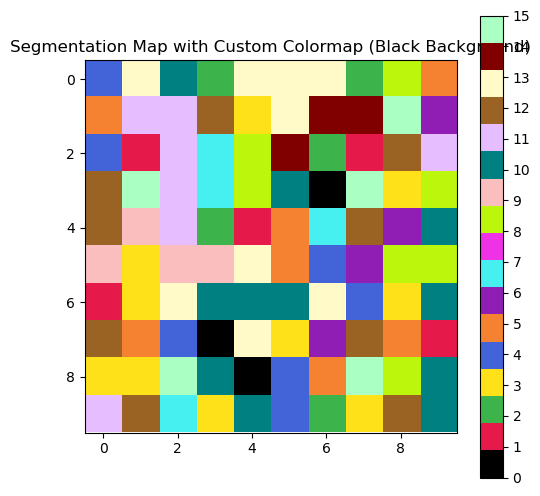

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Example data: a 10x10 array of random integers between 0 and 15
data = np.random.randint(0, 16, size=(10, 10))

# Define your custom colors including black as the first color for the background
colors = ['#000000',  # Black for background
          '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
          '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', 
          '#800000', '#aaffc3']

# Create a ListedColormap with your custom colors
custom_cmap = ListedColormap(colors)

# Plotting
plt.figure(figsize=(6, 6))
plt.title('Segmentation Map with Custom Colormap (Black Background)')
plt.imshow(data, cmap=custom_cmap)
plt.colorbar(ticks=range(16))  # Add ticks to colorbar for clarity
plt.show()
